# Q1

In [24]:
import pandas as pd
import math 
tsv_file='https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv'
 
# reading given tsv file
csv_table=pd.read_table(tsv_file,sep='\t')
 
# converting tsv file into csv
csv_table.to_csv('dataset1.csv',index=False,header=None)

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from collections import Counter

In [3]:
df=pd.read_csv('dataset1.csv',header=None)

In [4]:
df.head()

,0,1
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [5]:
df.rename(columns={0: 'prediction', 1: 'description'}, inplace=True)
df.to_csv('dataset1.csv', index=False)

In [6]:
df.head()

,prediction,description
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


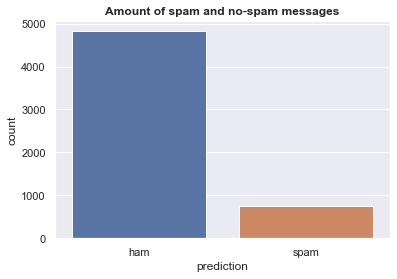

In [7]:
sns.set()
sns.countplot(data = df, x= df["prediction"]).set_title("Amount of spam and no-spam messages", fontweight = "bold")
plt.show()


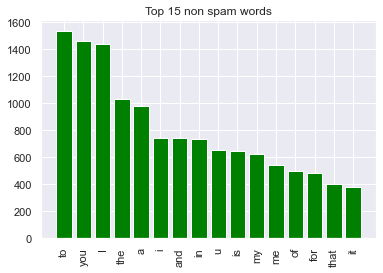

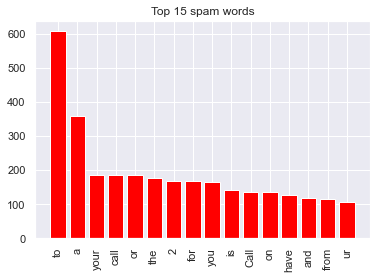

In [8]:
non_spam_messages = df[df["prediction"]=="ham"]["description"] #filters non-spam (ham) messages
l = [message.split() for message in non_spam_messages] #creates lists of words from each message
no_spam_words = list(itertools.chain.from_iterable(l)) #concatenates all lists of words into one

spam_messages = df[df["prediction"]=="spam"]["description"] 
k = [message.split() for message in spam_messages]
spam_words = list(itertools.chain.from_iterable(k))

non_spam = Counter(no_spam_words) #creates dictionary with occurrences of each no_spam word
spam = Counter(spam_words) #creates dictionary occurences of each spam word (creates dictionary)

non_spam = sorted(non_spam.items(), key=lambda kv: kv[1], reverse=True) #creates list sorted descending by value (number of occurences) 
spam = sorted(spam.items(), key=lambda kv: kv[1], reverse=True) 

top15_spam = spam[:16]
top15_nonspam = non_spam[:16]

#slice word and occurences so I can easily plot them
top_words_nonspam = [i[0] for i in top15_nonspam]  #(to,1530) [0]=to [1]=1530  
top_occurences_nonspam = [i[1] for i in top15_nonspam]

top_words_spam = [i[0] for i in top15_spam]       
top_occurences_spam = [i[1] for i in top15_spam]

plt.bar(top_words_nonspam, top_occurences_nonspam, color = 'green')
plt.title("Top 15 non spam words")
plt.xticks(rotation='vertical')
plt.show()

plt.bar(top_words_spam, top_occurences_spam, color = "red")
plt.title("Top 15 spam words")
plt.xticks(rotation='vertical')
plt.show()


In [9]:
X = df["description"]
y = df["prediction"]

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

cv = CountVectorizer(min_df = 0.01, max_features = 300, stop_words = 'english') #1% / 300 occurences 
cv.fit(X_train)

X_train = cv.transform(X_train)
X_test = cv.transform(X_test)

In [10]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)



MultinomialNB()

In [11]:
from sklearn.metrics import confusion_matrix
y_test_pred = model.predict(X_test)
confusion_matrix(y_test, y_test_pred)

array([[1164,   25],
       [  37,  167]], dtype=int64)

In [12]:
print(model.score(X_test, y_test))

0.955491744436468


In [13]:
def classifier(message):
    
    transformed = cv.transform([message])
    prediction =  model.predict(transformed)
    
    if prediction == "ham":
        return "This message is no spam!"
    else:
        return "This message is spam!"
    
classifier("Hi buddy how are you")

'This message is no spam!'

# Q2


In [55]:
from sklearn.datasets import load_iris
iris_data = load_iris()
df = pd.DataFrame(data=iris_data.data, 
                  columns=iris_data.feature_names)
x = load_iris().data
y = load_iris().target

In [56]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [57]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.25)


In [59]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))


Number of mislabeled points out of a total 1393 points : 0


In [60]:
output=gnb.predict([[5.9, 3. , 5.1, 1.8]])
if output==[0]:
    print('Iris Setosa')
elif output==[1]:
    print('-- Iris Versicolour')
else:
    print('Iris Virginica')
    

Iris Virginica



# Q2(ii)

In [72]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn

In [73]:
class GaussianNaiveBayes:
    
    # fit methods trains the data
    def fit(self,X,y,spar=10e-3): # here self is the variable which refers to current object of class 
        number_of_sample,number_of_features = X.shape # returns shape of X which is NxD dimensional
        # categories contains classes in Y uniquely due to Set
        self.categories=np.unique(y)
        
        # number_of_classes is the local variable
        number_of_classes=len(self.categories)
        
        # Initialising mean, var and priors
        self.gaussian_mean=np.zeros((number_of_classes,number_of_features),dtype=np.float64)
        self.gaussian_var=np.zeros((number_of_classes,number_of_features),dtype=np.float64)
        self.log_prior=np.zeros((number_of_classes),dtype=np.float64)
        
        # Calculating mean,var,prior based on categories in Y
        for classes in self.categories:
            X_classes=X[classes==y] # grouping into X_classes array according to category in y
            self.gaussian_mean[classes,:]=X_classes.mean(axis=0) # mean with each row of sample belonging particular column(features)
            self.gaussian_var[classes,:]=X_classes.var(axis=0)+spar
            self.log_prior[classes]=np.log(X_classes.shape[0]/float(number_of_sample)) #number of sample in a class/ total samples
            # i have logged prior because in posterior we will be calculation log_pdf in predict
            
        
        
        
    
    
    # predict method make prediction
    def predict(self,X):
        # posterior probablity dimension (number of sample,number of categories)
        posteriorS=np.zeros((X.shape[0],len(self.categories)))
        for classes in self.categories: # calculating posterior with log of class_conditional probablity + log prior 
            posteriorS[:,classes]=mvn.logpdf(X,
                                             mean=self.gaussian_mean[classes,:],
                                             cov=self.gaussian_var[classes,:]) + self.log_prior[classes]
        return np.argmax(posteriorS,axis=1)
        
    def accuracy(self,y_true,predicted):
        return np.mean(y_true==predicted)

In [74]:
from sklearn import datasets
X,y=datasets.make_classification(n_samples=3000,n_features=10,n_classes=2,random_state=42)

In [75]:
X_train=X[:2900,:]
X_test=X[2900:,]
y_train=y[:2900]
y_test=y[2900:]

In [76]:
nb=GaussianNaiveBayes()
nb.fit(X_train,y_train)

In [77]:
pr=nb.predict(X_test)

In [78]:
nb.accuracy(y_test,pr)

0.98

## Q3

In [83]:
data=pd.read_csv('Iris.csv')

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [88]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [94]:
y = data.Species.values
X = data.drop("Species",axis = 1).values

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [96]:
from sklearn import metrics

In [97]:
    from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95


In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [100]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [101]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [102]:
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.96       0.95333333 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667 0.97333333 0.96666667 0.96666667 0.97333333
 0.98       0.97333333 0.97333333 0.97333333 0.97333333 0.98
 0.97333333 0.98       0.96666667 0.96666667 0.97333333 0.96
 0.96666667 0.96       0.96666667 0.95333333 0.95333333 0.95333333]


In [103]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [104]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [105]:
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.960000,0.053333,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.960000,0.053333,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.953333,0.052068,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.960000,0.053333,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.966667,0.044721,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.966667,0.044721,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.966667,0.044721,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.966667,0.044721,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.966667,0.044721,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.966667,0.044721,"{'n_neighbors': 5, 'weights': 'distance'}"


In [106]:
print(grid.best_score_)
print(grid.best_params_)

0.9800000000000001
{'n_neighbors': 13, 'weights': 'uniform'}
